# ABALONE AGE PREDICTION
Mariyam CHEICK ISMAIL<br/>
ESILV A4 - DIA 2 <br/>
WEEK 7 

## Import dataset

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [237]:
train_set = pd.read_csv('./abalone_train/abalone_train_6.csv', names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
test_set = pd.read_csv('./abalone_test.csv', names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])

train_set.shape, test_set.shape

((3342, 9), (836, 9))

### Visualising the dataset

In [238]:
train_set.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,I,0.375,0.265,0.095,0.1960,0.0850,0.0420,0.0585,5
1,I,0.535,0.410,0.130,0.6075,0.2680,0.1225,0.1975,9
2,F,0.710,0.575,0.175,1.5550,0.6465,0.3705,0.5200,15
3,F,0.525,0.410,0.135,0.7905,0.4065,0.1980,0.1770,8
4,F,0.455,0.370,0.105,0.4925,0.2160,0.1245,0.1350,9


In [239]:
test_set.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.635,0.495,0.195,1.1720,0.4450,0.3115,0.3475,11.0
1,I,0.245,0.180,0.065,0.0710,0.0300,0.0130,0.0215,4.0
2,M,0.470,0.365,0.135,0.5220,0.2395,0.1525,0.1450,10.0
3,M,0.520,0.400,0.165,0.8565,0.2745,0.2010,0.2100,12.0
4,I,0.525,0.405,0.145,0.6965,0.3045,0.1535,0.2100,8.0


### Check for NULL/NaN values and drop if exists

In [240]:
train_set.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [241]:
test_set.isnull().any()

Sex               True
Length            True
Diameter          True
Height            True
Whole weight      True
Shucked weight    True
Viscera weight    True
Shell weight      True
Rings             True
dtype: bool

In [242]:
test_set = test_set.dropna()
train_set.shape, test_set.shape

((3342, 9), (835, 9))

### Splitting dataset

In [243]:
x_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1:]

x_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:, -1:]

### Preprocessing

Convert string to int for sex gender

In [244]:
x_train['Sex'] = x_train['Sex'].replace('I', 0)
x_train['Sex'] = x_train['Sex'].replace('M', 1)
x_train['Sex'] = x_train['Sex'].replace('F', 2)
x_train['Sex']

0       0
1       0
2       2
3       2
4       2
       ..
3337    1
3338    1
3339    0
3340    0
3341    2
Name: Sex, Length: 3342, dtype: int64

In [245]:
x_test['Sex'] = x_test['Sex'].replace('I', 0)
x_test['Sex'] = x_test['Sex'].replace('M', 1)
x_test['Sex'] = x_test['Sex'].replace('F', 2)
x_test['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
831    1
832    2
833    2
834    1
835    1
Name: Sex, Length: 835, dtype: int64

Convert int to float32

In [246]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

## Regression problem

In [247]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [248]:
model = keras.models.Sequential()
model.add(Dense(128, input_dim = 8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [249]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam',metrics = ['accuracy'])

In [250]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 200, verbose=0)

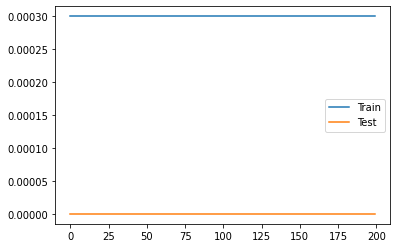

In [251]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()

In [252]:
def fit_model(train_X, train_y, test_X, test_y, optimizer, epochs = 200): 
    # Define model
    model = Sequential()
    model.add(Dense(128, input_dim = 8, activation="relu"))
    model.add(Dense(64, input_dim = 8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    # Compile model
    model.compile(loss = 'mean_squared_error', 
              optimizer = optimizer,
              metrics = ['accuracy'])
    
    # Fit model
    history = model.fit(train_X, train_y, 
                        validation_data=(test_X, test_y), 
                        epochs=epochs, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Test')
    plt.legend()

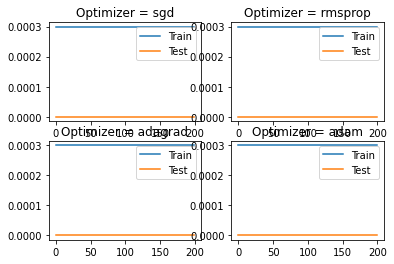

In [253]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']

for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for an optimizer
    fit_model(x_train, y_train, x_test, y_test, optimizers[i])
    plt.title('Optimizer = '+ optimizers[i])
# show learning curves
plt.show()

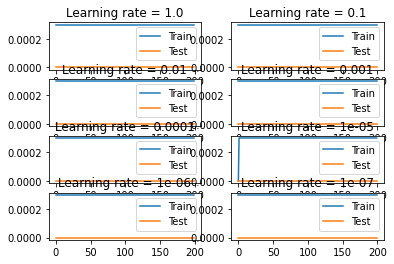

In [254]:
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

for i in range(len(learning_rates)):
    opt = SGD(lr = learning_rates[i])
    
    # Determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # Fit model and plot learning curves for a learning rate
    fit_model(x_train, y_train, x_test, y_test, opt)
    plt.title("Learning rate = " + str(learning_rates[i]))

# Show learning curves
plt.show()

In [255]:
def fit_model(train_X, train_y, test_X, test_y, optimizer, epochs = 200): 
    # Define model
    model = Sequential()
    model.add(Dense(128, input_dim = 8, activation="relu", kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation="relu", kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation="sigmoid"))
    
    # Compile model
    model.compile(loss = 'mean_squared_error', 
              optimizer = optimizer,
              metrics = ['accuracy'])
    
    # Fit model
    history = model.fit(train_X, train_y, 
                        validation_data=(test_X, test_y), 
                        epochs=epochs, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Test')
    plt.legend()

In [ ]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']

for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for an optimizer
    fit_model(x_train, y_train, x_test, y_test, optimizers[i])
    plt.title('Optimizer = '+ optimizers[i])
# show learning curves
plt.show()

In [ ]:
model4 = Sequential()

model4.add(Dense(256, activation='relu', input_shape=(8,)))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.summary()
model4.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'accuracy'])

history = model4.fit(x_train,y_train,batch_size=100,epochs=500,verbose=0)

test=model4.evaluate(x_test, y_test, verbose=1)

In [ ]:
test

After many attempts, considering this problem as a regression problem is not really a great idea, let's see if a classification problem is better. 

## Classification problem

Our y values go from 1 to 29. But, we want it to start from 0, so we minus 1 to all values. 

In [257]:
y_train -= 1
y_test -= 1

### Model 1

In [258]:
model5 = Sequential()
model5.add(Dense(8, input_dim=8, activation='relu'))
model5.add(Dense(29, activation="softmax"))
model5.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history5 = model5.fit(x_train,y_train,batch_size=100,epochs=500,verbose=0, validation_split=0.2)

In [259]:
test_loss, test_acc = model5.evaluate(x_test, y_test)
test_loss, test_acc

27/27 [==============================] - 0s 741us/step - loss: 2.0380 - accuracy: 0.2551


(2.037990093231201, 0.25508981943130493)

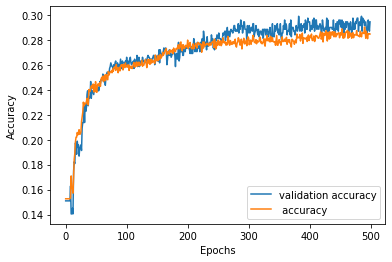

In [260]:
plt.plot(history5.history['val_accuracy'])
plt.plot(history5.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation accuracy', ' accuracy'])

### Model 2

In [261]:
model6 = Sequential()
model6.add(Dense(128, input_dim=8, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(29, activation="softmax"))
model6.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history6 = model6.fit(x_train,y_train,batch_size=100,epochs=500,verbose=0, validation_split=0.2)
test_loss, test_acc = model6.evaluate(x_test, y_test)
test_loss, test_acc

27/27 [==============================] - 0s 778us/step - loss: 2.0195 - accuracy: 0.2587


(2.0195248126983643, 0.25868263840675354)

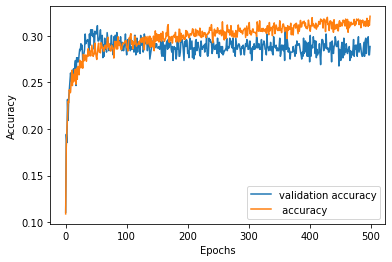

In [262]:
plt.plot(history6.history['val_accuracy'])
plt.plot(history6.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation accuracy', ' accuracy'])

### Model 3

In [263]:
model7 = Sequential()
model7.add(Dense(128, input_dim=8, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(64, input_dim=8, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(29, activation="softmax"))
model7.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history7 = model7.fit(x_train,y_train,batch_size=100,epochs=500,verbose=0, validation_split=0.2)
test_loss, test_acc = model7.evaluate(x_test, y_test)
test_loss, test_acc

27/27 [==============================] - 0s 741us/step - loss: 1.9911 - accuracy: 0.2419


(1.991110920906067, 0.24191616475582123)

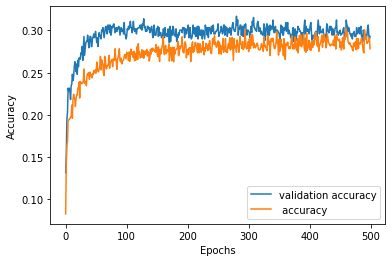

In [264]:
plt.plot(history7.history['val_accuracy'])
plt.plot(history7.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation accuracy', ' accuracy'])

### Model 4

In [265]:
model8 = Sequential()
model8.add(Dense(256, input_dim=8, activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(64,activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(29, activation="softmax"))
model8.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history8 = model8.fit(x_train,y_train,batch_size=100,epochs=500,verbose=0, validation_split=0.2)
test_loss, test_acc = model8.evaluate(x_test, y_test)
test_loss, test_acc

27/27 [==============================] - 0s 815us/step - loss: 1.9818 - accuracy: 0.2515


(1.9818179607391357, 0.2514970004558563)

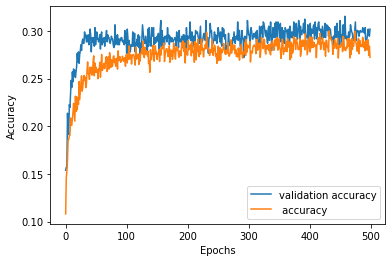

In [266]:
plt.plot(history8.history['val_accuracy'])
plt.plot(history8.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation accuracy', ' accuracy'])

### Model 5

In [267]:
model9 = Sequential()
model9.add(Dense(256, input_dim=8, activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(128, activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(96, activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(64,activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(29, activation="softmax"))
model9.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history9 = model9.fit(x_train,y_train,batch_size=100,epochs=500,verbose=0, validation_split=0.2)
test_loss, test_acc = model9.evaluate(x_test, y_test)
test_loss, test_acc

27/27 [==============================] - 0s 1ms/step - loss: 1.9691 - accuracy: 0.2707


(1.9690850973129272, 0.2706586718559265)

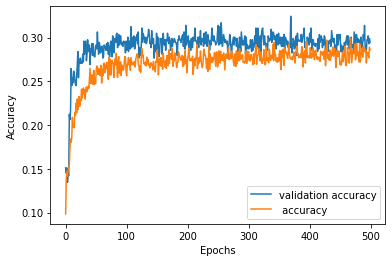

In [268]:
plt.plot(history9.history['val_accuracy'])
plt.plot(history9.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation accuracy', ' accuracy'])

### Model 6

In [269]:
model10 = Sequential()
model10.add(Dense(256, input_dim=8, activation='relu', kernel_regularizer=keras.regularizers.l2(5e-4)))
model10.add(Dropout(0.5))
model10.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(5e-4)))
model10.add(Dropout(0.5))
model10.add(Dense(96, activation='relu', kernel_regularizer=keras.regularizers.l2(5e-4)))
model10.add(Dropout(0.5))
model10.add(Dense(64,activation='relu', kernel_regularizer=keras.regularizers.l2(5e-4)))
model10.add(Dropout(0.5))
model10.add(Dense(29, activation="softmax", kernel_regularizer=keras.regularizers.l2(5e-4)))
model10.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history10 = model10.fit(x_train,y_train,batch_size=100,epochs=500,verbose=0, validation_split=0.2)
test_loss, test_acc = model10.evaluate(x_test, y_test)
test_loss, test_acc

27/27 [==============================] - 0s 1ms/step - loss: 2.0134 - accuracy: 0.2575


(2.0133779048919678, 0.257485032081604)

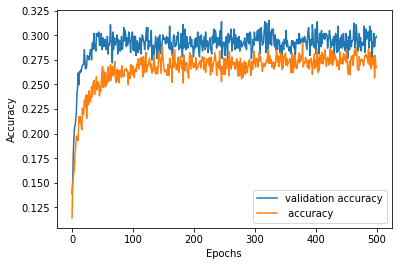

In [270]:
plt.plot(history10.history['val_accuracy'])
plt.plot(history10.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['validation accuracy', ' accuracy'])

## Prediction

In [273]:
predictions = model9.predict(x_test)

In [274]:
predictions = [predictions[i].argmax() for i in range(len(predictions))]
predictions

[10,
 4,
 8,
 9,
 8,
 8,
 10,
 8,
 10,
 8,
 8,
 9,
 8,
 12,
 8,
 5,
 8,
 8,
 6,
 10,
 8,
 8,
 6,
 10,
 12,
 3,
 7,
 10,
 8,
 9,
 8,
 7,
 8,
 8,
 10,
 10,
 9,
 8,
 7,
 6,
 10,
 8,
 6,
 10,
 9,
 8,
 9,
 6,
 12,
 8,
 10,
 4,
 7,
 8,
 6,
 7,
 9,
 10,
 8,
 8,
 8,
 9,
 8,
 10,
 10,
 9,
 8,
 6,
 8,
 7,
 6,
 12,
 6,
 7,
 9,
 10,
 8,
 9,
 8,
 7,
 6,
 7,
 8,
 6,
 8,
 8,
 8,
 8,
 12,
 9,
 9,
 8,
 8,
 9,
 8,
 11,
 8,
 8,
 6,
 10,
 8,
 7,
 9,
 10,
 8,
 8,
 7,
 8,
 5,
 8,
 8,
 8,
 8,
 8,
 6,
 10,
 10,
 6,
 10,
 5,
 7,
 8,
 12,
 12,
 8,
 6,
 10,
 8,
 7,
 10,
 9,
 12,
 9,
 12,
 8,
 6,
 12,
 10,
 8,
 10,
 9,
 8,
 5,
 10,
 8,
 6,
 6,
 9,
 12,
 9,
 4,
 8,
 8,
 5,
 9,
 8,
 9,
 7,
 12,
 8,
 8,
 9,
 8,
 8,
 9,
 8,
 8,
 8,
 6,
 8,
 10,
 8,
 10,
 10,
 8,
 8,
 9,
 8,
 12,
 10,
 10,
 6,
 10,
 8,
 5,
 10,
 8,
 8,
 5,
 15,
 8,
 5,
 15,
 3,
 7,
 7,
 8,
 7,
 8,
 9,
 8,
 6,
 7,
 7,
 3,
 8,
 8,
 10,
 10,
 9,
 8,
 6,
 9,
 8,
 12,
 6,
 8,
 8,
 10,
 9,
 7,
 6,
 7,
 8,
 4,
 8,
 10,
 10,
 6,
 8,
 7,
 8,
 6,
 5,
 7,
 10,
 